## COMPRENSIÓN DE LOS DATOS

* En esta etapa de CRISP-DM esta involucrada la recopilacion de los datos y explorarlos para obtener el estado actual de los datos asi como asegurar la calidad de los datos.

**Recopilacion y Origen de los datos:**
* Los datos se obtienen de las fuentes de **Kaggle** llamada 'Kaggle X-Ray Datasets', y el repositorio de datos en **github** 'ieee x-ray github'.

    * Kaggle [Click Here!](https://www.kaggle.com/tawsifurrahman/covid19-radiography-database)
    * Github IEEE [click Here!](https://github.com/ieee8023/covid-chestxray-dataset)
    
![Fuentes](imagen_esquema_fuentes.png)

### Descripcion de los datos:

* **Datos de radiografias de COVID-19 |Fuente Kaggle**:  Esta fuente posee radiografias de COVID-19, Pneumonia viral, Lung Opacity y normales.
* **Datos de radiografias IEEE GITHUB**: Esta fuente posee radiografias de distintos tipos de enfermedades pulmonares. De tipos Viral, bacterial, etc. Incluyendo COVID-19.


### Comprension de los datos:

* **Dataset de radiografias Kaggle** : Exploraremos las imagenes mas minuciosamente

In [1]:
#exploramos la estructura de la carpeta del dataset

path_kaggle="../Datasets/KAGGLE_COVID-19_Radiography_Dataset/"

import os
for file in os.listdir(path_kaggle):
    print(file)

Podemos observar que la fuente de datos kaggle tiene una metadata (datos sobre los datos) por cada carpeta de imagenes asociada, asi que exploraremos dichos datos y metadata de cada uno.

#### Inspeccionamos  los datos de COVID-19

In [2]:
path_image_covid=os.path.join(path_kaggle,"COVID")
#contamos cuantas imagenes posee
cantidad_img=len(os.listdir(path_image_covid))
print(f"{cantidad_img} Imagenes de covid-19")

Mostramos algunas imagenes referentes al COVID-19

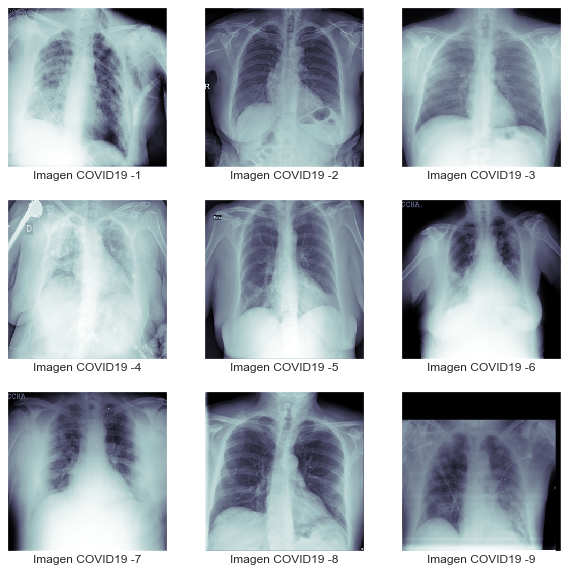

In [3]:
#realizamos algunas importaciones de datos
import matplotlib.pyplot as plt
import random
import seaborn as sns; sns.set()
#mostramos las 9 primeras imagenes en grillas de 3x3
#desarrollamos una funcion para automatizar la muestra de imagenes por condicion de entrada

def show_xrays(path=None,size_img=(3,3),target=None):
    fig,axes=plt.subplots(size_img[0],size_img[1])
    fig.set_size_inches(10,10)
    img_list=os.listdir(path)
    img_list=random.sample(img_list,size_img[0]*size_img[1])
    #plt.axis(False)
    for i,ax in enumerate(axes.flat):
        image=plt.imread(os.path.join(path,img_list[i]))
        ax.imshow(image,cmap="bone",interpolation="nearest")
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel(f"Imagen {target} -{i+1}")
    plt.show()

show_xrays(path_image_covid,target="COVID19")

Identificaremos las fuentes y caracteristicas de las que se extrajeron los datos, esto por la metadata adjunta

In [4]:
#importamos la libreria pandas para al manejo de DataFrames
import pandas as pd

metadata_covid=pd.read_excel(os.path.join(path_kaggle,"COVID.metadata.xlsx"))
metadata_covid.head()

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


In [5]:
metadata_covid.FORMAT.value_counts(normalize=True).apply(lambda x:f"{x*100}%")

PNG    100.0%
Name: FORMAT, dtype: object

El 100% de los datos son de formato PNG y el tamaño de las imagenes son de 256*256

In [6]:
metadata_covid.URL.value_counts(normalize=True).apply(lambda x:f"{x*100:0.2f}%") #mostramos los porcentajes con 2 decimales

https://bimcv.cipf.es/bimcv-projects/bimcv-covid19/#1590858128006-9e640421-6711    68.42%
https://github.com/armiro/COVID-CXNet                                              11.06%
https://eurorad.org                                                                 7.13%
https://github.com/ml-workgroup/covid-19-image-repository/tree/master/png           5.06%
https://github.com/ieee8023/covid-chestxray-dataset                                 5.03%
https://sirm.org/category/senza-categoria/covid-19/                                 3.29%
Name: URL, dtype: object

De aqui concluimos que el 68% de obtuvo de BIMCV, 11.06% de COVID-CXNet, entre otros.Mostramos una grafica de barras para entender mejor los datos

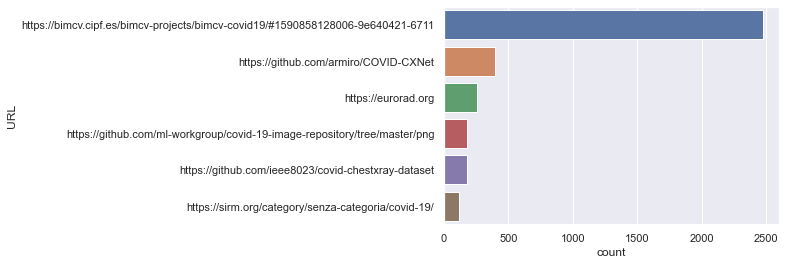

In [7]:
sns.countplot(y="URL",data=metadata_covid,order=metadata_covid.URL.value_counts().index)
plt.show()

#### Inspeccionamos los datos Pneumonia Viral

In [8]:
path_image_pneumonia=os.path.join(path_kaggle,"Viral Pneumonia")
#contamos cuantas imagenes posee
cantidad_img=len(os.listdir(path_image_pneumonia))
print(f"{cantidad_img} Imagenes de Pneumonia")

1345 Imagenes de Pneumonia


Visualizamos las radiografias de la pneumonia

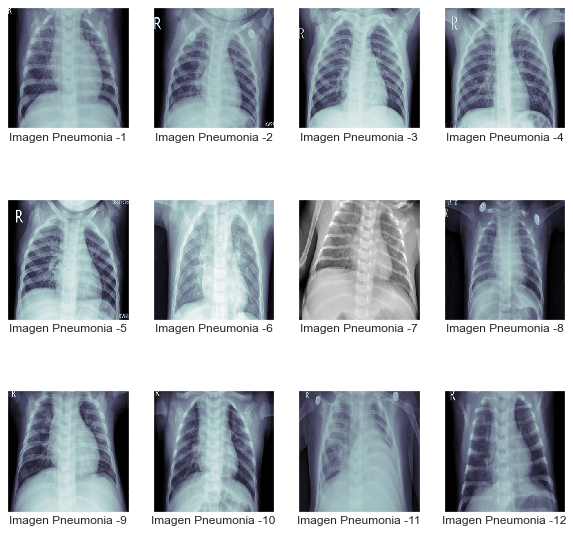

In [9]:
show_xrays(path_image_pneumonia,size_img=(3,4),target="Pneumonia")

In [10]:
#mostramos y extraemos informacion de la metadata adjunta de Pneumonia 'Viral Pneumonia.metadata.xlsx'

metadata_pneumonia=pd.read_excel(os.path.join(path_kaggle,"Viral Pneumonia.metadata.xlsx"))
metadata_pneumonia.head(3) #mostramos los primeros 3 registros

,FILE NAME,FORMAT,SIZE,URL
0,Viral Pneumonia-1,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
1,Viral Pneumonia-2,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
2,Viral Pneumonia-3,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...


In [11]:
#proporcion de formato de imagenes
metadata_pneumonia.FORMAT.value_counts(normalize=True).apply(lambda x: f"{x*100:0.2f}%")

PNG    100.00%
Name: FORMAT, dtype: object

Mostramos la proporcion de la fuente de imagenes

In [12]:
metadata_pneumonia.URL.value_counts(normalize=True).apply(lambda x: f"{x*100:0.2f}%")

https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia    100.00%
Name: URL, dtype: object

Interesante, la toda proporcion de imagenes de donde se obtuvo datos de pneumonia son del sitio: https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

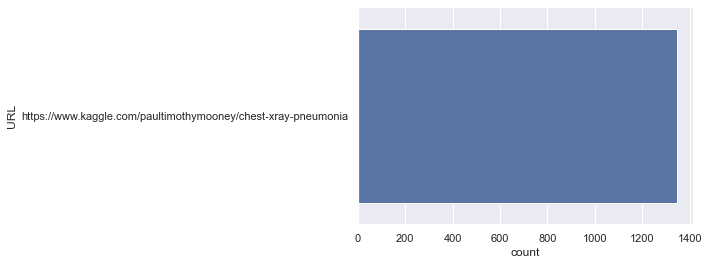

In [13]:
#mostramos la grafica de barras para entender mejor el contexto
sns.countplot(y="URL",data=metadata_pneumonia,order=metadata_pneumonia.URL.value_counts().index)
plt.show()

#### Inspeccionamos los datos Lung Opacity

* La opacificación pulmonar representa el resultado de una disminución en la proporción de gases a tejidos blandos (sangre, parénquima pulmonar y estroma) en el pulmón. Al revisar un área de mayor atenuación (opacificación) en una radiografía de tórax o TC, es vital determinar dónde está la opacificación. Los patrones se pueden dividir ampliamente en opacificación del espacio aéreo, líneas y puntos.

Primero mostramos la cantidad de datos

In [14]:
path_image_lungopacity=os.path.join(path_kaggle,"Lung_Opacity")
#contamos cuantas imagenes posee
cantidad_img=len(os.listdir(path_image_lungopacity))
print(f"{cantidad_img} Imagenes de Lung_Opacity")

6012 Imagenes de Lung_Opacity


Mostramos las muestras de radiografias de Lung Opacity

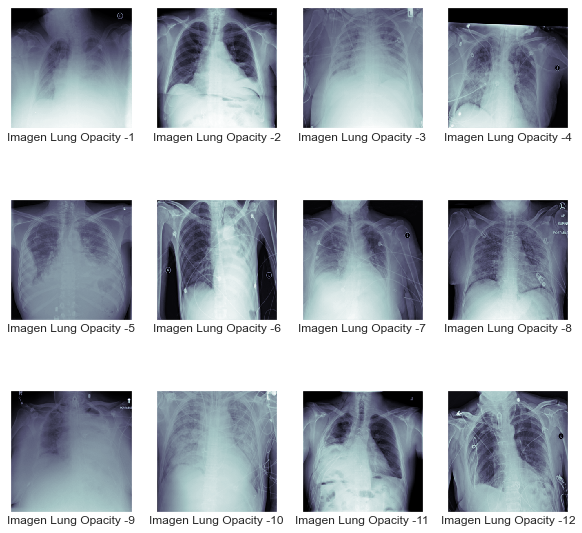

In [15]:
show_xrays(path_image_lungopacity,size_img=(3,4),target="Lung Opacity")

In [16]:
#mostramos y extraemos informacion de la metadata adjunta de Lung opacity 'Lung_Opacity.metadata.xlsx'

metadata_lungopacity=pd.read_excel(os.path.join(path_kaggle,"Lung_Opacity.metadata.xlsx"))
metadata_lungopacity.head(3) #mostramos los primeros 3 registros

,FILE NAME,FORMAT,SIZE,URL
0,Lung_Opacity-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,Lung_Opacity-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
2,Lung_Opacity-3,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...


In [17]:
#proporcion de formato de imagenes
metadata_lungopacity.FORMAT.value_counts(normalize=True).apply(lambda x: f"{x*100:0.2f}%")

PNG    100.00%
Name: FORMAT, dtype: object

Mostramos la proporcion de fuentes donde se extrayeron estos datasets.

In [18]:
metadata_lungopacity.URL.value_counts(normalize=True).apply(lambda x: f"{x*100:0.2f}%")

https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data    100.00%
Name: URL, dtype: object

Por lo visto los datos de Lung Opacity se obtuvieron de un repositorio de challenge de obtencion de radiografias

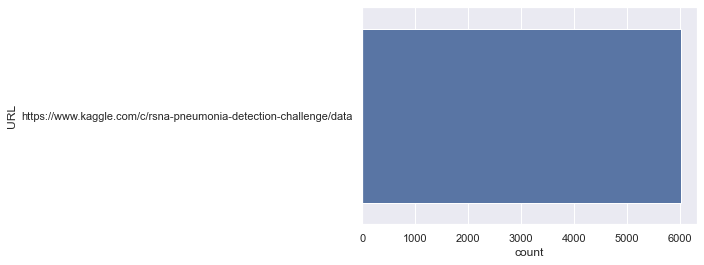

In [19]:
#mostramos la grafica de barras para entender mejor el contexto
sns.countplot(y="URL",data=metadata_lungopacity,order=metadata_lungopacity.URL.value_counts().index)
plt.show()

#### Inspeccionamos los datos de radiografias Normales

Son aquellas que corresponden a pacientes sin ninguna afeccion pulmonar

In [20]:
path_image_normal=os.path.join(path_kaggle,"Normal")
#contamos cuantas imagenes posee
cantidad_img=len(os.listdir(path_image_normal))
print(f"{cantidad_img} Imagenes de Normal")

10192 Imagenes de Normal


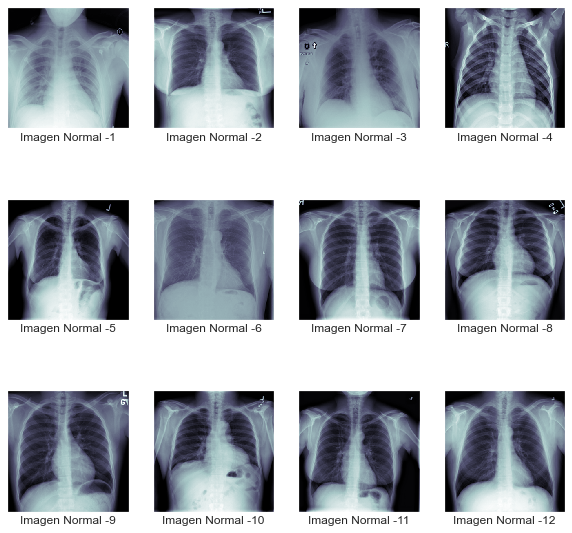

In [21]:
show_xrays(path_image_normal,size_img=(3,4),target="Normal")

In [22]:
#mostramos y extraemos informacion de la metadata adjunta de Normal 'Normal.metadata.xlsx'

metadata_normal=pd.read_excel(os.path.join(path_kaggle,"Normal.metadata.xlsx"))
metadata_normal.head(3) #mostramos los primeros 3 registros

,FILE NAME,FORMAT,SIZE,URL
0,NORMAL-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,NORMAL-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
2,NORMAL-3,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...


In [23]:
#proporcion de formato de imagenes
metadata_normal.FORMAT.value_counts(normalize=True).apply(lambda x: f"{x*100:0.2f}%")

PNG    100.00%
Name: FORMAT, dtype: object

Mostramos la proporcion de fuentes de donde se extrayeron las imagenes de radiografias normales

In [24]:
metadata_normal.URL.value_counts(normalize=True).apply(lambda x: f"{x*100:0.2f}%")

https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data    86.84%
https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia       13.16%
Name: URL, dtype: object

La fuentes de datos de radiografias normales son en su  mayoria de **RSNA Pneumonia detection** con 86.84% de los datos, mientras que **Chest Xray Pneumonia** ocupa un 13.16% de los datos.

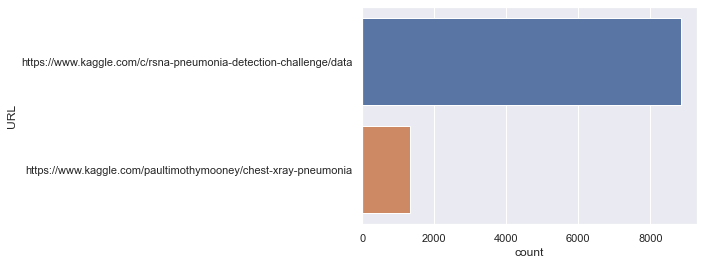

In [25]:
#mostramos la grafica de barras para entender mejor el contexto
sns.countplot(y="URL",data=metadata_normal,order=metadata_normal.URL.value_counts().index)
plt.show()

#### Vista general de los datos

La proporcion final de las diferentes enfermedades pulmonares

In [26]:
path_images={"COVID":0,"NORMAL":0,"Lung_Opacity":0,"Viral Pneumonia":0}
for path in path_images:
    count=len(os.listdir(os.path.join(path_kaggle,path)))
    path_images[path]=count

In [27]:
for name,value in path_images.items():
    print(f"{name}: {value}")

COVID: 3616
NORMAL: 10192
Lung_Opacity: 6012
Viral Pneumonia: 1345


In [28]:
for name,value in path_images.items():
    print(f"{name}: {value*100/sum(path_images.values()):0.2f}%")

COVID: 17.08%
NORMAL: 48.15%
Lung_Opacity: 28.41%
Viral Pneumonia: 6.35%


La mayor cantidad de daros esta concentrado en radiografias Normales, seguido de LungOpacity, luego COVID, y por ultimo pneumonia viral.

Ahora realizamos una comparativa de las imagenes

In [5]:
def select_n_image(path,n=1):
    list_img=os.listdir(path)
    img_select=random.sample(list_img,n)
    return os.path.join(path,img_select[0])

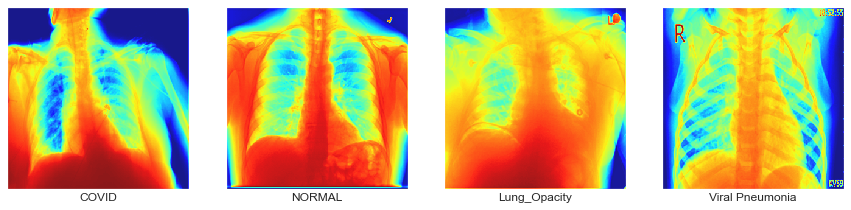

In [30]:
fig,axes=plt.subplots(1,4)
fig.set_size_inches(15,4)
imagenes_elegidas=[(path,select_n_image(os.path.join(path_kaggle,path))) for path in path_images.keys()] #obtnemos las rutas de la imagenes elegidas
for i,ax in enumerate(axes.flat):
    img=plt.imread(imagenes_elegidas[i][1])
    ax.imshow(img,interpolation="nearest",cmap="jet",alpha=0.9)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_xlabel(imagenes_elegidas[i][0])
plt.show()

* Examinamos la estructura de los datos

In [20]:
from PIL import Image
import os,random
import numpy as np

In [14]:
path_image_select=select_n_image("../Datasets/val/Normal/")

In [16]:
img=Image.open(path_image_select)

In [24]:
array_img=np.array(img) #mostramos una estructura del array de la imagen
print(array_img)

[[ 0  0  0 ... 82 79 75]
 [ 0  0  0 ... 80 77 73]
 [ 0  0  0 ... 78 76 71]
 ...
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  1  0  1]
 [ 0  0  0 ...  1  1  2]]


In [25]:
#miramos la dimension de los datos
print(array_img.shape)

(299, 299)


* **Observacion**: Las imagenes tienen un tamaño de (299x299) solo dos dimensiones lo que equivale a imagenes blanco y negro. Para el entrenamiento de la red neuronal debemos tener en cuenta dicha examinacion como dimension de entrada a la red.

Al tratarse de imagenes muy grandes, se recurre a diminuir su dimension a (256x256) en la fase de modelado haciendo uso de generadores de flujo de imagenes.

La red tendra como entrada (256,256,1): Imagenes de 256 pixeles de ancho y 256 pix largo y un canal que equivale a 1 (Blanco y negro)

Esta fase finaliza una vez coleccionado los datos y haber obtenido una vista general del problema